In [82]:
import tensorflow as tf
%load_ext autoreload
%autoreload
from Scripts import get_data
from Scripts import NeuralNetwork
from Scripts import plot
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
X_train, y_train, X_val, y_val, X_test, y_test = get_data.load_dataset(flatten=True)

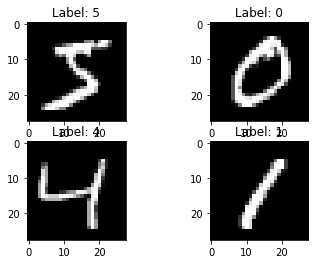

In [26]:
%matplotlib inline
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.title("Label: %i"%y_train[i])
    plt.imshow(X_train[i].reshape([28,28]),cmap='gray');

In [65]:
ohe = OneHotEncoder()
ohe.fit(y_train.reshape(-1, 1))

In [68]:
y_train_ohe = ohe.transform(y_train.reshape(-1, 1)).toarray()

In [72]:
epochs = 5
batch_size = 100
eta = 0.001
lmbd = 1
n_hidden_neurons = 50


dnn = NeuralNetwork.NN(X_train, y_train_ohe, eta=eta, lmbd=lmbd, epochs=epochs, batch_size=batch_size,
                    n_hidden_neurons=n_hidden_neurons, n_categories=y_train_ohe.shape[1])
dnn.train()
test_predict = dnn.predict(X_test)

# accuracy score from scikit library
#print("Accuracy score on test set: ", accuracy_score(z.ravel(), test_predict))

# equivalent in numpy
#def accuracy_score_numpy(Y_test, Y_pred):
#    return np.sum(Y_test == Y_pred) / len(Y_test)

#print("Accuracy score on test set: ", accuracy_score_numpy(Y_test, test_predict))

In [73]:
y_test_ohe = ohe.transform(y_test.reshape(-1, 1)).toarray()

In [78]:
y_pred_ohe = ohe.transform(test_predict.reshape(-1, 1)).toarray()

In [79]:
print("Accuracy score on test set: ", accuracy_score(y_test_ohe, y_pred_ohe))

Accuracy score on test set:  0.8949


In [83]:
conf_matrix = plot.compute_modified_confusion_matrix_nonorm(y_test_ohe, y_pred_ohe)

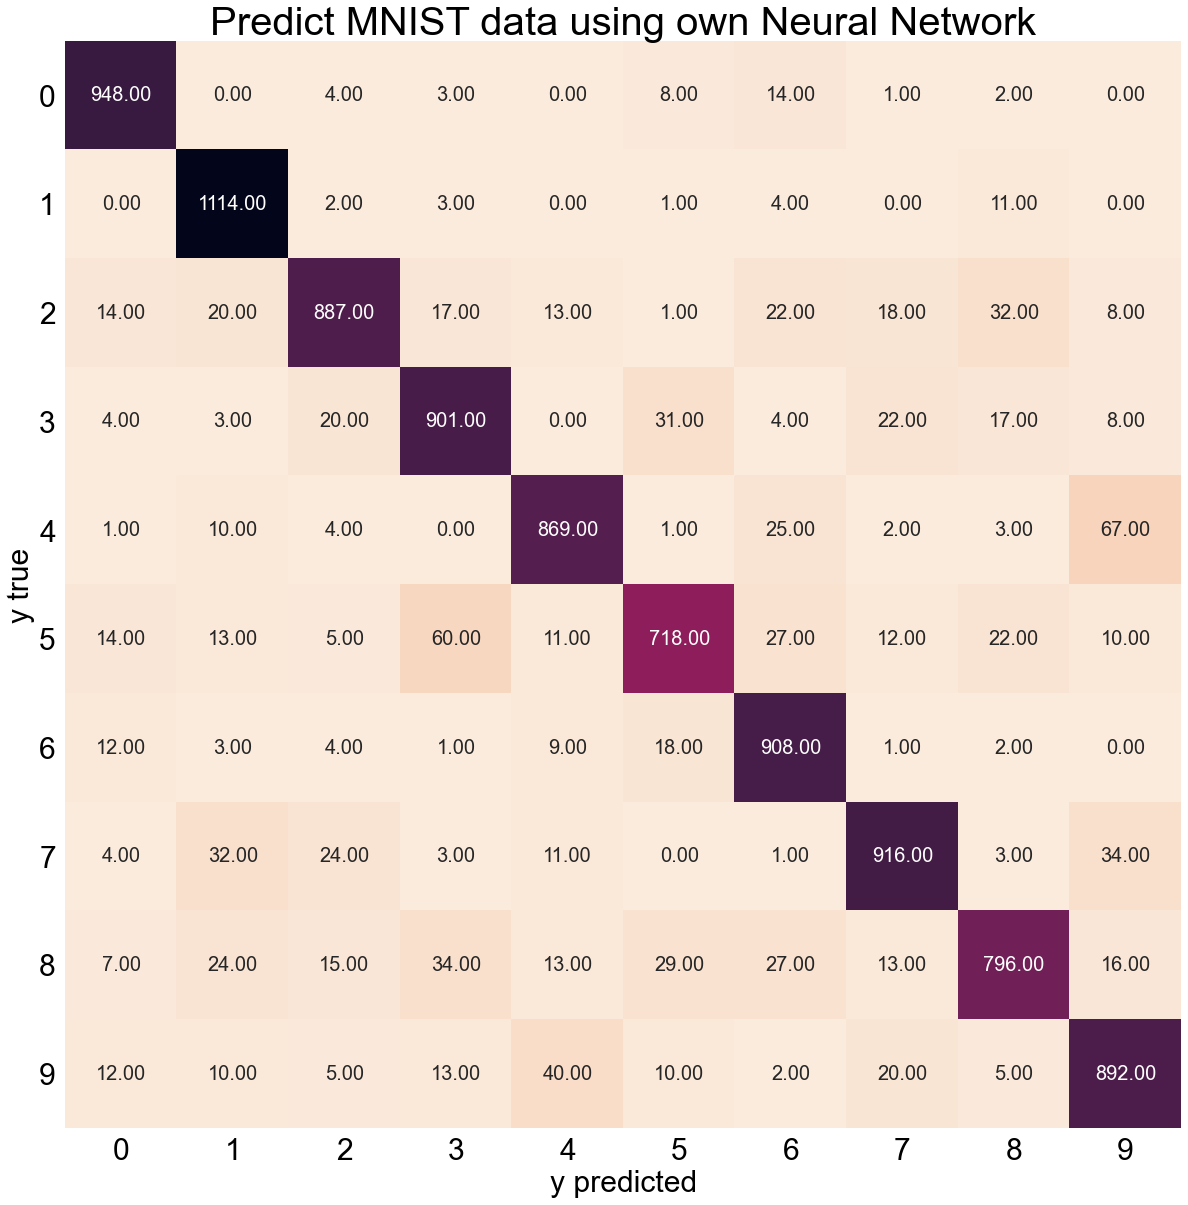

In [87]:
plt.figure(figsize = (20,20))
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_matrix, cmap="rocket_r", annot=True,annot_kws={"size": 20}, fmt=".2f", cbar=False)
plt.title("Predict MNIST data using own Neural Network", fontsize = 40, color= "black")
plt.xlabel("y predicted",fontsize=30, color= "black")
plt.ylabel("y true",fontsize = 30, color= "black")
plt.yticks(fontsize=30, rotation=0, color= "black")
plt.xticks(fontsize=30, rotation=0, color= "black")
plt.savefig("Results/MNIST_confMatrix_ownNN.png",dpi=100)
plt.show()

Epoch 24
Train accuracy: 1.0
Val accuracy: 0.9815


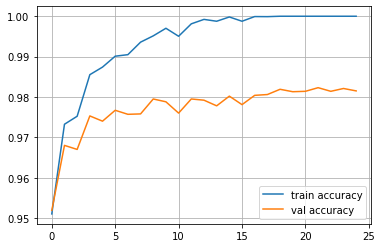

In [29]:
from IPython.display import clear_output
train_log = []
val_log = []
for epoch in range(25):
    for x_batch,y_batch in iterate_minibatches(X_train,y_train,batchsize=32,shuffle=True):
        NeuralNetwork.train(network,x_batch,y_batch)
    
    train_log.append(np.mean(NeuralNetwork.predict(network,X_train)==y_train))
    val_log.append(np.mean(NeuralNetwork.predict(network,X_val)==y_val))
    
    clear_output()
    print("Epoch",epoch)
    print("Train accuracy:",train_log[-1])
    print("Val accuracy:",val_log[-1])
    plt.plot(train_log,label='train accuracy')
    plt.plot(val_log,label='val accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()